In [1]:
import pandas as pd
import numpy as np
import ml_02_pca
import matplotlib.pyplot as plt
%reload_ext version_information
np.__version__, pd.__version__


('1.16.4', '0.24.2')

<h3>Einlesen des Boston-Housing Datensatzes</h3>

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, index_col=False)

In [3]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h3>1. Zentrieren der Daten</h3>

In [4]:
for col in cols:
    boston[col] = boston[col] - np.mean(boston[col])

In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-3.024370e-15,2.076161e-14,-2.800395e-14,-1.189760e-16,2.641716e-16,-8.141050e-15,-3.552714e-14,1.720187e-15,4.683123e-15,3.370163e-13,-2.348582e-14,7.632296e-13,-3.565001e-15,-2.570100e-14
std,8.601545e+00,2.332245e+01,6.860353e+00,2.539940e-01,1.158777e-01,7.026171e-01,2.814886e+01,2.105710e+00,8.707259e+00,1.685371e+02,2.164946e+00,9.129486e+01,7.141062e+00,9.197104e+00
min,-3.607204e+00,-1.136364e+01,-1.067678e+01,-6.916996e-02,-1.696951e-01,-2.723634e+00,-6.567490e+01,-2.665443e+00,-8.549407e+00,-2.212372e+02,-5.855534e+00,-3.563540e+02,-1.092306e+01,-1.753281e+01
25%,-3.531479e+00,-1.136364e+01,-5.946779e+00,-6.916996e-02,-1.056951e-01,-3.991344e-01,-2.354990e+01,-1.694868e+00,-5.549407e+00,-1.292372e+02,-1.055534e+00,1.870347e+01,-5.703063e+00,-5.507806e+00
50%,-3.357014e+00,-1.136364e+01,-1.446779e+00,-6.916996e-02,-1.669506e-02,-7.613439e-02,8.925099e+00,-5.875927e-01,-4.549407e+00,-7.823715e+01,5.944664e-01,3.476597e+01,-1.293063e+00,-1.332806e+00
75%,6.355894e-02,1.136364e+00,6.963221e+00,-6.916996e-02,6.930494e-02,3.388656e-01,2.550010e+01,1.393382e+00,1.445059e+01,2.577628e+02,1.744466e+00,3.955097e+01,4.301937e+00,2.467194e+00
max,8.536268e+01,8.863636e+01,1.660322e+01,9.308300e-01,3.163049e-01,2.495366e+00,3.142510e+01,8.331457e+00,1.445059e+01,3.027628e+02,3.544466e+00,4.022597e+01,2.531694e+01,2.746719e+01


<h3>2. Normieren der Daten auf eine Varianz von 1</h3>

In [6]:
for col in cols:
    boston[col] = boston[col] / np.std(boston[col])

In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-5.285627e-16,-2.354671e-15,5.092545e-16,2.544736e-15,-1.146031e-14,-1.122510e-15,9.834031e-16,1.553873e-15,-8.012914e-16,-1.020966e-14,8.075008e-15,-3.370163e-16,-2.967762e-15
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


<h3>3. Kopieren aller Daten xi als Reihen in eine n × d-Matrix X(Daten- oder Designmatrix).</h3>

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [9]:
n, d = np.shape(boston)
X = np.zeros((n, d))
for ni in range(n):
    for di in range(d):
        X[ni, di] = boston[cols[di]][ni]
#Alternativ: X = boston.to_numpy()

In [10]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

<h3>Berechnung der <I>Singulärwertzerlegung</I> von X mit <I>numpy.linalg.svd()</I></h3>

In [11]:
u,d,vt = np.linalg.svd(X, full_matrices=False)
v = vt.transpose()

In [12]:
v

array([[ 2.42284451e-01, -6.58731079e-02,  3.95077419e-01,
        -1.00366211e-01,  4.95765921e-03, -2.24627030e-01,
         7.77083366e-01, -1.57401402e-01,  2.54211798e-01,
        -7.13846149e-02, -7.10687807e-02,  6.32761157e-02,
         9.70323119e-02,  5.91141759e-02],
       [-2.45435005e-01, -1.48002653e-01,  3.94545713e-01,
        -3.42958421e-01,  1.14495002e-01, -3.35746944e-01,
        -2.74178365e-01,  3.80314042e-01,  3.82899480e-01,
         2.45579673e-01, -1.27709065e-01, -2.21122101e-01,
        -1.32375830e-01, -9.62968067e-02],
       [ 3.31859746e-01,  1.27075668e-01, -6.60819134e-02,
         9.62693566e-03, -2.25836917e-02, -8.08249519e-02,
        -3.40273839e-01, -1.71745781e-01,  6.27048264e-01,
        -2.54827026e-01,  2.73797614e-01,  3.48408284e-01,
         8.37168543e-02, -2.35472877e-01],
       [-5.02713285e-03,  4.10668763e-01, -1.25305293e-01,
        -7.00406497e-01, -5.35197817e-01,  1.62649056e-01,
         7.40757751e-02,  3.29270041e-02, -1.

<h3>5. Die ersten r Basisvektoren qi (d.h die ersten r Hauptkomponenten) sind die ersten r
Spalten der orthogonalen d × d-Matrix V .</h3>

In [13]:
r = 2
for ri in range(r):
    print(v[:,ri])

[ 0.24228445 -0.24543501  0.33185975 -0.00502713  0.32519388 -0.20281655
  0.29697657 -0.29816981  0.30341275  0.32403305  0.20767953 -0.19663836
  0.31139796 -0.2666364 ]
[-0.06587311 -0.14800265  0.12707567  0.41066876  0.25427636  0.43400581
  0.2603032  -0.35914998  0.0311496   0.00885141 -0.31462306  0.02648103
 -0.20124518  0.44492441]


6. Die Projektionen ai der Daten xi auf die ersten r Basisvektoren qj (d.h die neuen
Variablenwerte im neuen Koordinatensystem) sind die die ersten r Spalten der n × d Matrix UD.

7. Die Standardabweichungen entlang der Hauptkomponenten qi sind die Diagonalelemente der Diagonalmatrix D geteilt durch n − 1.

In [14]:
u * d
#Alternativ: u.dot(np.diag(d))

array([[-2.08734386e+00,  4.92853292e-01, -3.35990796e-01, ...,
        -1.09628939e-01, -4.94679790e-01,  2.47931084e-01],
       [-1.37338153e+00, -1.70923779e-01, -9.65964271e-01, ...,
         5.88700953e-01, -1.13056500e-01, -1.13116820e-01],
       [-2.37655336e+00,  9.14027176e-01, -9.00257783e-02, ...,
         4.16418193e-01,  3.57029666e-01,  5.13074653e-02],
       ...,
       [-3.68189649e-01,  8.23162397e-01, -9.33509355e-01, ...,
        -3.14763317e-01, -1.48478525e-01,  2.31503312e-03],
       [-2.64317340e-01,  5.40016199e-01, -1.03326735e+00, ...,
        -2.99460745e-01, -1.40693787e-01, -9.27786630e-03],
       [ 1.95235127e-01, -5.57976483e-01, -1.57608018e+00, ...,
        -4.28275137e-01, -5.09133897e-01, -1.35112101e-01]])

<h2>1a) Verwendung der pca als Modul</h2>

In [15]:
pc, ai, quadd, means = ml_02_pca.pca(boston, 14)

In [16]:
np.shape(pc)

(14, 14)

In [17]:
#ai

In [18]:
np.shape(ai)

(14, 506)

<h3> 1b) Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der Kovarianzmatrix
(Achtung: die Diagonalelemente von D müssen dafür quadriert und durch n − 1 geteilt
werden. Warum?) ...</h3>

Die Standardabweichungen entlang der Hauptkomponenten qi sind die Diagonalelemente der Diagonalmatrix D geteilt durch n − 1 (siehe 7.).
Das Quadrieren ist nötig, da die Varianz benötigt wird. Um diese zu erhalten muss die Standardabweichung quadriert werden.

Diese Schritte werden bereits im ml_02_pca Modul ausgeführt.

In [29]:
np.diag(quadd)

array([[6.55895193, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.65279831, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.35157702, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.88829539, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.85258439,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0. 

<h3>..., dem Anteil der zugehörigen Hauptkomponente an an der Gesamtvarianz
(“erklärte Varianz”) und der kumulativen erklärten Varianz dar, d.h. welchen Varianzanteil
die ersten n Komponenten zusammen erklären. Wieviele Dimensionen können Sie weglassen,
wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?</h3>

Berechnung der Gesamtvarianz

In [44]:
np.sum(quadd)

14.027722772277235

In [52]:
var = pd.DataFrame(columns=['ew', 'Var_Anteil', 'kumulative Var', 'Anteil'])
sumv = np.sum(quadd)
s = 0
sproz = 0
for i in range(14):
    s = s + quadd[i]
    proz = quadd[i] / sumv
    sproz = sproz + proz
    var = var.append({'ew':quadd[i], 'Var_Anteil': proz, 'kumulative Var': s, 'Anteil': sproz}, ignore_index=True)
var

,ew,Var_Anteil,kumulative Var,Anteil
0,6.558952,0.467571,6.558952,0.467571
1,1.652798,0.117824,8.211750,0.585394
2,1.351577,0.096350,9.563327,0.681745
3,0.888295,0.063324,10.451623,0.745069
4,0.852584,0.060779,11.304207,0.805848
5,0.661318,0.047144,11.965525,0.852991
6,0.536471,0.038244,12.501996,0.891235
7,0.403875,0.028791,12.905871,0.920026
8,0.277813,0.019805,13.183683,0.939831
9,0.252757,0.018018,13.436440,0.957849


Wieviele Dimensionen können Sie weglassen,
wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?

1% : Nur die letzte Dimension, da der Anteil der ersten 13 Komponenten >99% und der ersten 12 <99% ist.

5% : Die letzten vier

10% : Die letzten sechs

<h2>1c) Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. </h2>

In [41]:
matrix = np.zeros((3, np.shape(X)[1]))
for i in range(3):
    for j in range(np.shape(X)[1]):
        matrix[i][j] = np.corrcoef(ai[i], X[:,j])[0][1]

pd.DataFrame.from_records(matrix.transpose())

,0,1,2
0,0.619888,-0.084604,0.458852
1,-0.627949,-0.190086,0.458235
2,0.849068,0.163208,-0.076749
3,-0.012862,0.527439,-0.145533
4,0.832013,0.326578,-0.053978
5,-0.518909,0.557411,0.410454
6,0.759818,0.334318,-0.233241
7,-0.762871,-0.461271,0.182423
8,0.776286,0.040007,0.486068
9,0.829043,0.011368,0.398638


Interpretieren Sie Ihr Ergebnis.

Bis auf die vierte Variable werden alle Variablen gut von der ersten Hauptkomponente dargestellt, da die Zahlen recht hoch sind. Diese Variable wird allerdings von der zweiten Hauptkomponente gut dargestellt. Mit den ersten drei Hauptkomponenten werden alle Variablen gut dargestellt.

<h2>1d) Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in
Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis
oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb.</h2>

<function matplotlib.pyplot.show(*args, **kw)>

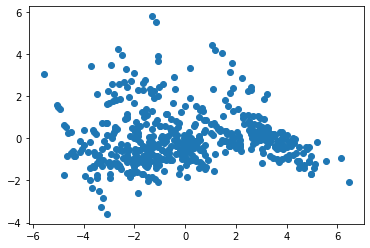

In [25]:
df = pd.DataFrame.from_records(ai[0:2]).transpose()
#plot = pd.plotting.scatter_matrix(df, figsize=(14,14), marker='o');
plt.plot(df[0],df[1], 'o')
plt.show

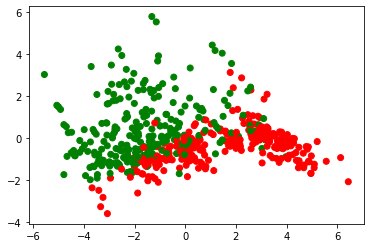

In [26]:
#ref = boston[boston['TGT'] >= boston['TGT'].describe()['50%']].index.values
plt.scatter(df[0],df[1], color=np.where(boston['TGT'] >= boston['TGT'].describe()['50%'], 'g', 'r'))

<h3>Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?</h3>

Bedingt. Es ist zwar ein Muster von zwei Wolken zu erkennen, aber diese überschneiden sich. Bei einer Vorhersage mit diesen Variablen wird also die Fehlerrate recht hoch sein.

In [27]:
%version_information numpy, pandas, matplotlib

Software versions
Python 3.7.3 64bit [MSC v.1915 64 bit (AMD64)]
IPython 7.6.1
OS Windows 10 10.0.18362 SP0
numpy 1.16.4
pandas 0.24.2
matplotlib 3.1.0
Mon Nov 11 08:54:16 2019 Mitteleuropäische Zeit